In [ ]:
!pip install hyppo

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from hyppo.independence import MGC, HHG

## 1

1. Исследуйте зависимость выборок 𝑋 и 𝑌 = 𝑓(𝑋) + 𝑈 с помощью коэффициентов Пирсона, Спирмена, Кенделла, MGC. Шум 𝑈 возьмите независимыми 𝑅[−2, 2] величинами. Рассмотрите шесть случаев: 𝑋 ∼ 𝑅[0,1] или 𝑋 ∼ 𝑅[−10,10],а𝑓(𝑥) = 2𝑥 + 5или𝑓(𝑥) = 𝑥^2 или 𝑓(𝑥) = 𝑥cos𝑥.

In [4]:
# 1

U = np.random.uniform(-2, 2, 500)

func1 = lambda x: 2*x + 5
func2 = lambda x: x ** 2
func3 = lambda x: x * math.cos(x)

x1 = np.random.uniform(0, 1, 500)
x2 = np.random.uniform(-10, 10, 500)

y1_func1_x1 = [func1(x1[i]) + U[i] for i in range(len(U))]
y2_func1_x2 = [func1(x2[i]) + U[i] for i in range(len(U))]
y3_func2_x1 = [func2(x1[i]) + U[i] for i in range(len(U))]
y4_func2_x2 = [func2(x2[i]) + U[i] for i in range(len(U))]
y5_func3_x1 = [func3(x1[i]) + U[i] for i in range(len(U))]
y6_func3_x2 = [func3(x2[i]) + U[i] for i in range(len(U))]

Коэффициент корреляции Пирсона измеряет линейную зависимость между двумя наборами данных. Как и другие коэффициенты корреляции, этот варьируется от -1 до +1, где 0 означает отсутствие корреляции. Корреляции -1 или +1 подразумевают точную линейную зависимость. Положительные корреляции подразумевают, что с увеличением x увеличивается и y. Отрицательные корреляции подразумевают, что с увеличением x уменьшается y.

Эта функция также выполняет проверку нулевой гипотезы о том, что распределения, лежащие в основе выборок, являются некоррелированными и нормально распределенными.

## Пирсон

(0.47908544706706346, 4.709824576433978e-30)


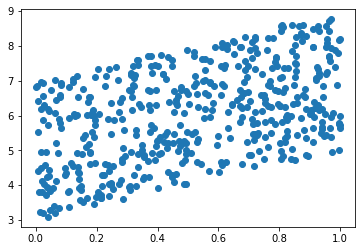

In [5]:
print(pearsonr(x1, y1_func1_x1))
plt.plot(x1, y1_func1_x1, "o")
plt.show()

(0.279629492615482, 1.959867822877253e-10)


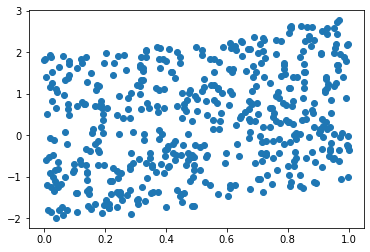

In [6]:
print(pearsonr(x1, y3_func2_x1))
plt.plot(x1, y3_func2_x1, "o")
plt.show()

(0.17565659485763455, 7.85723005308163e-05)


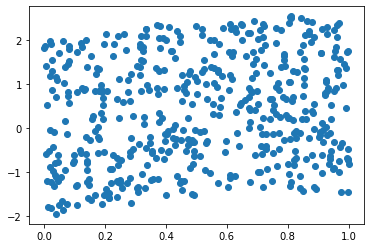

In [7]:
print(pearsonr(x1, y5_func3_x1))
plt.plot(x1, y5_func3_x1, "o")
plt.show()

(0.9950329007101364, 0.0)


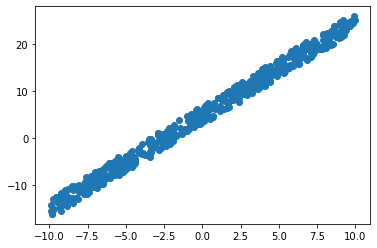

In [8]:
print(pearsonr(x2, y2_func1_x2))
plt.plot(x2, y2_func1_x2, "o")
plt.show()

(-0.010083311396455432, 0.8220484406655854)


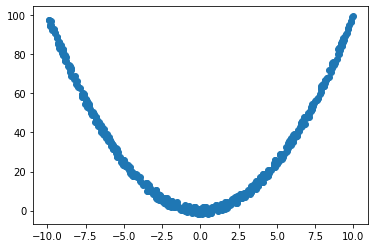

In [9]:
print(pearsonr(x2, y4_func2_x2))
plt.plot(x2, y4_func2_x2, "o")
plt.show()

(-0.23317459965936316, 1.3365662665831563e-07)


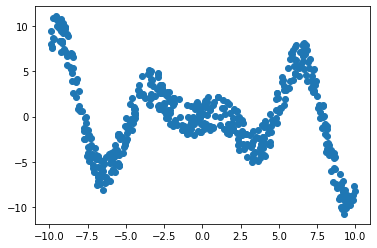

In [10]:
print(pearsonr(x2, y6_func3_x2))
plt.plot(x2, y6_func3_x2, "o")
plt.show()

## Спирман

SpearmanrResult(correlation=0.44910122040488154, pvalue=3.4502695742381424e-26)


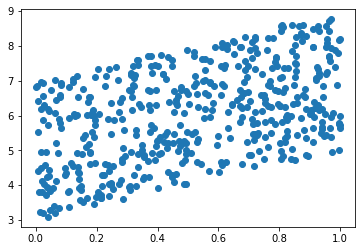

In [11]:
print(spearmanr(x1, y1_func1_x1))
plt.plot(x1, y1_func1_x1, "o")
plt.show()

SpearmanrResult(correlation=0.2699340717362869, pvalue=8.513219964483744e-10)


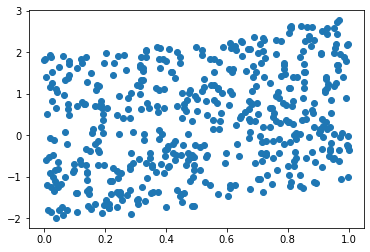

In [12]:
print(spearmanr(x1, y3_func2_x1))
plt.plot(x1, y3_func2_x1, "o")
plt.show()

SpearmanrResult(correlation=0.16852944211776846, pvalue=0.00015302080962229815)


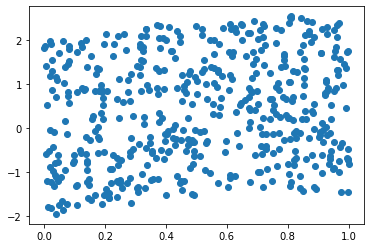

In [13]:
print(spearmanr(x1, y5_func3_x1))
plt.plot(x1, y5_func3_x1, "o")
plt.show()

SpearmanrResult(correlation=0.9945215460861844, pvalue=0.0)


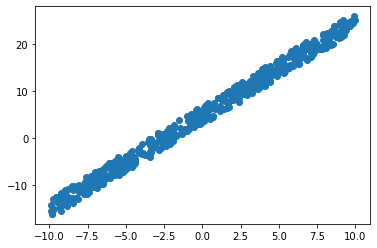

In [14]:
print(spearmanr(x2, y2_func1_x2))
plt.plot(x2, y2_func1_x2, "o")
plt.show()

SpearmanrResult(correlation=-0.03389216756867027, pvalue=0.4495458672082018)


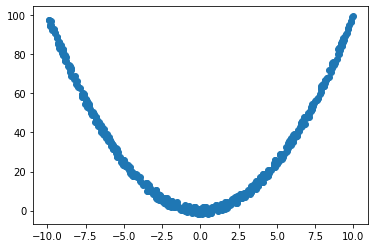

In [15]:
print(spearmanr(x2, y4_func2_x2))
plt.plot(x2, y4_func2_x2, "o")
plt.show()

SpearmanrResult(correlation=-0.16798262393049573, pvalue=0.00016087468917100938)


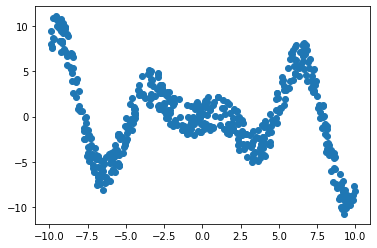

In [16]:
print(spearmanr(x2, y6_func3_x2))
plt.plot(x2, y6_func3_x2, "o")
plt.show()

## Кенделл

Это мера соответствия между двумя рейтингами. Значения, близкие к 1, указывают на сильное согласие, а значения, близкие к -1, указывают на сильное несогласие. Это реализует два варианта тау Кендалла: тау-b (по умолчанию) и тау-с (также известный как тау-с Стюарта). Они отличаются только тем, как они нормализованы, чтобы лежать в диапазоне от -1 до 1; проверки гипотез (их p-значения) идентичны. Исходный тау-а Кендалла не реализуется отдельно, потому что и тау-b, и тау-с сводятся к тау-а при отсутствии связей.

SpearmanrResult(correlation=0.44910122040488154, pvalue=3.4502695742381424e-26)


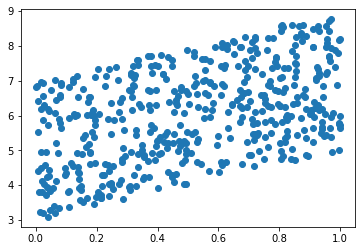

In [17]:
print(spearmanr(x1, y1_func1_x1))
plt.plot(x1, y1_func1_x1, "o")
plt.show()

SpearmanrResult(correlation=0.2699340717362869, pvalue=8.513219964483744e-10)


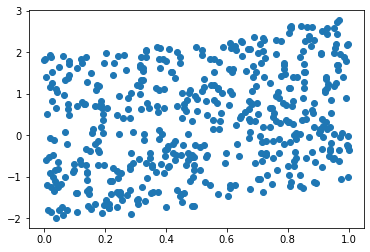

In [18]:
print(spearmanr(x1, y3_func2_x1))
plt.plot(x1, y3_func2_x1, "o")
plt.show()

SpearmanrResult(correlation=0.16852944211776846, pvalue=0.00015302080962229815)


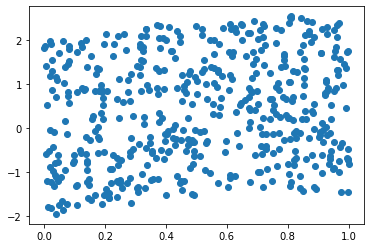

In [19]:
print(spearmanr(x1, y5_func3_x1))
plt.plot(x1, y5_func3_x1, "o")
plt.show()

SpearmanrResult(correlation=0.9945215460861844, pvalue=0.0)


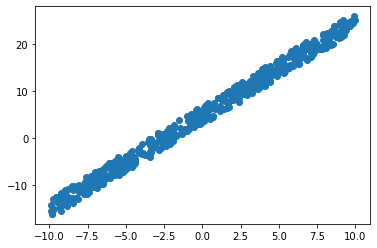

In [20]:
print(spearmanr(x2, y2_func1_x2))
plt.plot(x2, y2_func1_x2, "o")
plt.show()

SpearmanrResult(correlation=-0.03389216756867027, pvalue=0.4495458672082018)


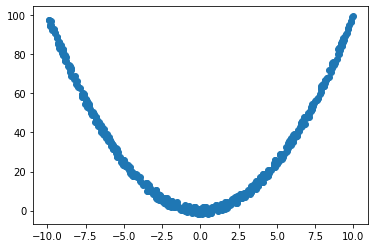

In [21]:
print(spearmanr(x2, y4_func2_x2))
plt.plot(x2, y4_func2_x2, "o")
plt.show()

(-0.23317459965936316, 1.3365662665831563e-07)


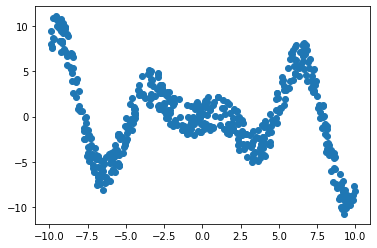

In [22]:
print(pearsonr(x2, y6_func3_x2))
plt.plot(x2, y6_func3_x2, "o")
plt.show()

## MGC

0.19108157924043928 0.000999000999000999


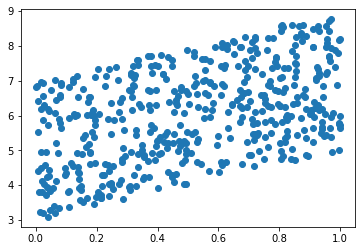

In [23]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y1_func1_x1), workers=-1)
print(stat, pvalue)
plt.plot(x1, y1_func1_x1, "o")
plt.show()

0.06431428412297104 0.000999000999000999


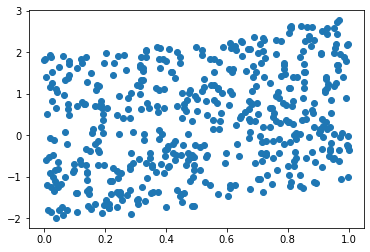

In [24]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y3_func2_x1), workers=-1)
print(stat, pvalue)
plt.plot(x1, y3_func2_x1, "o")
plt.show()

0.031091795463097184 0.000999000999000999


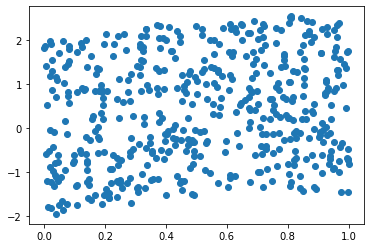

In [25]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y5_func3_x1), workers=-1)
print(stat, pvalue)
plt.plot(x1, y5_func3_x1, "o")
plt.show()

0.9882159996842098 0.000999000999000999


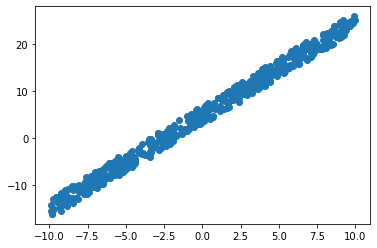

In [26]:
stat, pvalue, _ = MGC().test(np.array(x2), np.array(y2_func1_x2), workers=-1)
print(stat, pvalue)
plt.plot(x2, y2_func1_x2, "o")
plt.show()

0.6229770477437705 0.000999000999000999


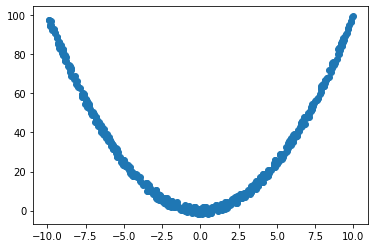

In [27]:
stat, pvalue, _ = MGC().test(np.array(x2), np.array(y4_func2_x2), workers=-1)
print(stat, pvalue)
plt.plot(x2, y4_func2_x2, "o")
plt.show()


0.42906706323379956 0.000999000999000999


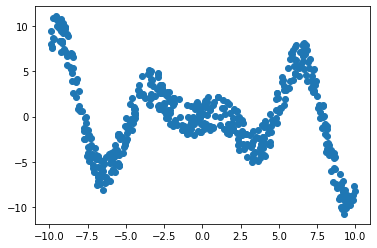

In [28]:
stat, pvalue, _ = MGC().test(np.array(x2), np.array(y6_func3_x2), workers=-1)
print(stat, pvalue)
plt.plot(x2, y6_func3_x2, "o")
plt.show()

# 2

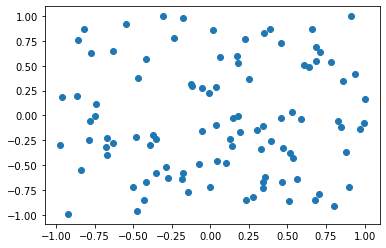

In [29]:
# Без Кендалла (он слишком простой)

x1 = np.random.uniform(-1,1,100)
y1 = np.random.uniform(-1,1,100)

plt.plot(x1, y1, 'o')

63 63


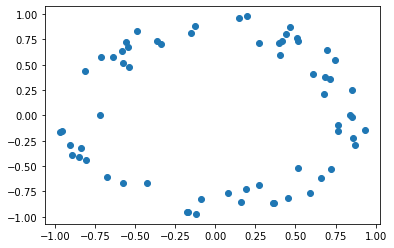

In [30]:
x2 = []
y2 = []

x = np.random.uniform(-1, 1, 150)
y = np.random.uniform(-1, 1, 150)
# plt.plot(x, y, 'o')

for i in range (0, len(x)):
    if (x[i]*x[i] + y[i]*y[i]) > 1/2 and (x[i]*x[i] + y[i]*y[i]) < 1:
        x2.append(x[i])
        y2.append(y[i])
print (len(x2), len(y2))

plt.plot(x2, y2, 'o')

177 177


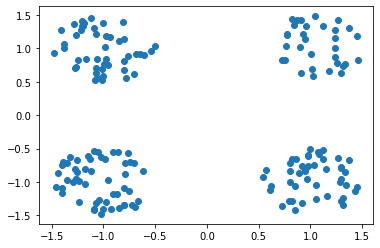

In [31]:
x3 = []
y3 = []

x = np.random.uniform(-1.5, 1.5, 500)
y = np.random.uniform(-1.5, 1.5, 500)
# plt.plot(x, y, 'o')

for i in range (0, len(x)):
    if ((x[i]-1)*(x[i]-1) + (y[i]-1)*(y[i]-1)) < 1/4 or ((x[i]-1)*(x[i]-1) + (y[i]+1)*(y[i]+1)) < 1/4 or ((x[i]+1)*(x[i]+1) + (y[i]-1)*(y[i]-1)) < 1/4 or ((x[i]+1)*(x[i]+1) + (y[i]+1)*(y[i]+1)) < 1/4:
        x3.append(x[i])
        y3.append(y[i])
print (len(x3), len(y3))

plt.plot(x3, y3, 'o')

In [32]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y1), workers=-1)
print(stat, pvalue)

stat, pvalue, _ = MGC().test(np.array(x2), np.array(y2), workers=-1)
print(stat, pvalue)

stat, pvalue, _ = MGC().test(np.array(x3), np.array(y3), workers=-1)
print(stat, pvalue)

-0.012351916200101577 0.8821178821178821
0.2162882599624691 0.000999000999000999
-0.00622415014264695 0.9010989010989011


In [33]:
stat, pvalue = HHG().test(np.array(x1), np.array(y1))
print(stat, pvalue)

stat, pvalue = HHG().test(np.array(x2), np.array(y2))
print(stat, pvalue)

stat, pvalue = HHG().test(np.array(x3), np.array(y3))
print(stat, pvalue)

7038.830868385297 0.8911088911088911
10155.126439772273 0.001998001998001998
25074.187292187697 0.7202797202797203


## 3

In [34]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [35]:
sample = np.random.exponential(1, size=(100,3))
df1 = pd.DataFrame(sample)
df1.set_axis(['X', 'Y', 'Z'], axis=1, inplace=True)
df1
print(sample.shape)

(100, 3)


In [36]:
matrix = np.array([[2, 0.5, 1], [0.4, -1, 0.4], [0, 0.5, 1]])
uvw = []
for i in range(0,100):
    el = sample[i,:].dot(matrix)
    uvw.append(el)

df = pd.DataFrame(uvw)
df.set_axis(['U', 'V', 'W'], axis=1, inplace=True)
df

,U,V,W
0,0.990839,1.469453,3.227266
1,1.613851,-0.227638,3.144920
2,2.930426,1.173431,2.535840
3,3.617687,-2.024405,3.037374
4,1.175263,-2.200601,1.364462
...,...,...,...
95,0.329766,0.327783,1.067360
96,1.646739,-0.825444,1.796677
97,1.355866,-0.199593,1.077889
98,0.360274,1.361723,4.128292


In [37]:
#frames = [df1, df]
data = result = pd.concat([df1, df], axis=1)
data

,X,Y,Z,U,V,W
0,0.471389,0.120150,2.707817,0.990839,1.469453,3.227266
1,0.506909,1.500082,2.037979,1.613851,-0.227638,3.144920
2,1.449465,0.078740,1.054879,2.930426,1.173431,2.535840
3,1.218328,2.952577,0.638015,3.617687,-2.024405,3.037374
4,0.107159,2.402360,0.296359,1.175263,-2.200601,1.364462
...,...,...,...,...,...,...
95,0.130567,0.171581,0.868161,0.329766,0.327783,1.067360
96,0.536073,1.436485,0.686010,1.646739,-0.825444,1.796677
97,0.554843,0.615448,0.276867,1.355866,-0.199593,1.077889
98,0.063066,0.585352,3.831085,0.360274,1.361723,4.128292


          X         Y         Z         U         V         W
X  1.000000 -0.110742 -0.102070  0.972923  0.413705  0.641029
Y -0.110742  1.000000 -0.054860  0.121964 -0.887435  0.228087
Z -0.102070 -0.054860  1.000000 -0.114693  0.345917  0.615338
U  0.972923  0.121964 -0.114693  1.000000  0.206776  0.693224
V  0.413705 -0.887435  0.345917  0.206776  1.000000  0.246371
W  0.641029  0.228087  0.615338  0.693224  0.246371  1.000000


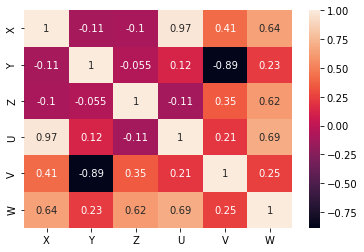

In [38]:
corr_matrix = data.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

# 4

In [53]:
x1 = []
x2 = []
x3 = []

with open("babies.txt") as file:
    first_line = file.readline()
    
    for line in file:
        temp = line.strip().split()
        
        x1.append(float(temp[0]))
        x2.append(float(temp[1]))
        x3.append(float(temp[2]))

In [54]:
import seaborn as sns

data = pd.DataFrame([x1, x2, x3]).T
data

,0,1,2
0,0.729,280.1,3.0
1,0.785,402.2,3.0
2,0.625,351.4,3.0
3,0.604,315.5,3.0
4,0.701,306.0,3.0
5,0.957,315.0,3.0
6,0.664,220.2,3.0
7,0.640,223.6,12.0
8,0.464,214.3,12.0
9,0.684,224.5,12.0


<AxesSubplot:xlabel='0', ylabel='1'>

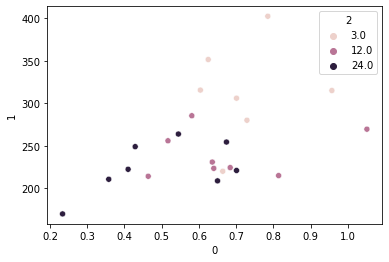

In [52]:
sns.scatterplot(data=data, x=0, y=1, hue=2)

Коэффициент корреляции Пирсона
(0.44992001901124123, 0.031230270862916024)


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии euclidean
0.08180234442219494 0.12287712287712288


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии cityblock
0.08180234442219536 0.11688311688311688


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии cosine
0.0 1.0


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии l1
0.08180234442219536 0.11688311688311688


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии l2
0.08180234442219494 0.12787212787212787


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии manhattan
0.08180234442219536 0.13286713286713286


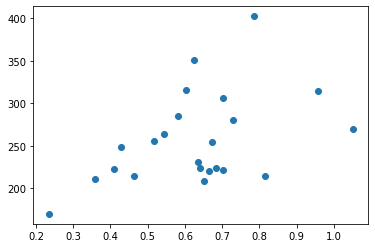

In [40]:
# зависимость x1 и x2

compute_distances = ["euclidean", "cityblock", "cosine", "l1", "l2", "manhattan"]

print(f"Коэффициент корреляции Пирсона")
print(pearsonr(x1, x2))

for i in range(len(compute_distances)):
    stat, pvalue, _ = MGC(compute_distance=compute_distances[i]).test(np.array(x1), np.array(x2), workers=-1)
    print(f"Коэффициент корреляции MGC при расстоянии {compute_distances[i]}")
    print(stat, pvalue)

plt.plot(x1, x2, "o")
plt.show()

In [41]:
x11 = []
x22 = []

with open("babies.txt") as file:
    first_line = file.readline()
    
    for line in file:
        temp = line.strip().split()
        
        if temp[2] == '3':
            x11.append(float(temp[0]))
        elif temp[2] == '24':
            x22.append(float(temp[1]))

Коэффициент корреляции Пирсона
(0.6415595880099386, 0.12038448884061365)

Коэффициент корреляции MGC при расстоянии euclidean
0.09120492848199878 0.2777222777222777

Коэффициент корреляции MGC при расстоянии cityblock
0.09120492848199638 0.25574425574425574

Коэффициент корреляции MGC при расстоянии cosine
0.0 1.0

Коэффициент корреляции MGC при расстоянии l1
0.09120492848199638 0.26973026973026976

Коэффициент корреляции MGC при расстоянии l2
0.09120492848199878 0.2677322677322677

Коэффициент корреляции MGC при расстоянии manhattan
0.09120492848199638 0.2547452547452547



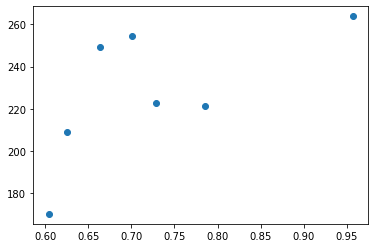

In [42]:
# зависимость x1 при малом возрасте и x2 при большом возрасте

print(f"Коэффициент корреляции Пирсона")
print(pearsonr(x11, x22[:len(x22) - 1]))
print()

for i in range(len(compute_distances)):
    stat, pvalue, _ = MGC(compute_distance=compute_distances[i]).test(np.array(x11),
                                                                      np.array(x22[:len(x22) - 1]),
                                                                      workers=-1)
    
    print(f"Коэффициент корреляции MGC при расстоянии {compute_distances[i]}")
    print(stat, pvalue)
    print()

plt.plot(x11, x22[:len(x22) - 1], "o")
plt.show()

Можно сделать вывод, что нет линейной зависимости

In [43]:
x11 = []
x22 = []

with open("babies.txt") as file:
    first_line = file.readline()
    
    for line in file:
        temp = line.strip().split()
        
        if temp[2] == '3':
            x11.append(float(temp[0]))
        elif temp[2] == '12':
            x22.append(float(temp[1]))

Коэффициент корреляции Пирсона
(-0.4462202241929359, 0.3155803314806441)

Коэффициент корреляции MGC при расстоянии euclidean
0.12010539671362654 0.21078921078921078

Коэффициент корреляции MGC при расстоянии cityblock
0.12010539671362068 0.24175824175824176

Коэффициент корреляции MGC при расстоянии cosine
0.0 1.0

Коэффициент корреляции MGC при расстоянии l1
0.12010539671362068 0.2087912087912088

Коэффициент корреляции MGC при расстоянии l2
0.12010539671362654 0.2047952047952048

Коэффициент корреляции MGC при расстоянии manhattan
0.12010539671362068 0.22877122877122877



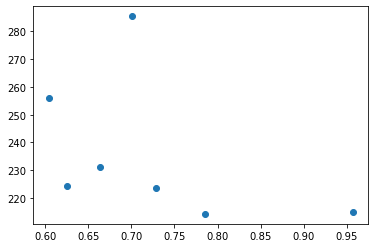

In [44]:
# зависимость x1 при малом возрасте и x2 при большом возрасте

print(f"Коэффициент корреляции Пирсона")
print(pearsonr(x11, x22[:len(x22) - 1]))
print()

for i in range(len(compute_distances)):
    stat, pvalue, _ = MGC(compute_distance=compute_distances[i]).test(np.array(x11),
                                                                      np.array(x22[:len(x22) - 1]),
                                                                      workers=-1)
    
    print(f"Коэффициент корреляции MGC при расстоянии {compute_distances[i]}")
    print(stat, pvalue)
    print()

plt.plot(x11, x22[:len(x22) - 1], "o")
plt.show()